## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("titanic_train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

### Missing Data

<AxesSubplot:>

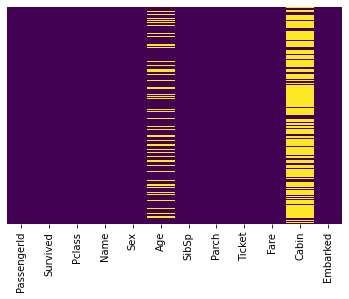

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

Roughly 20% of the age data is missing. The proportion of missing age is small for a reasonable replacement with some form of calculations. On the other hand the cabin colum has a lot of missing values to make some useful conclusion

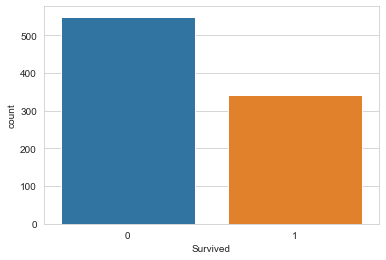

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train);

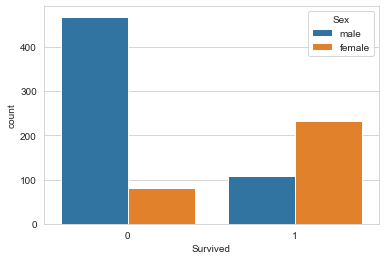

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex');

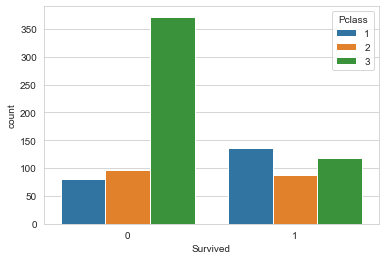

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Pclass');

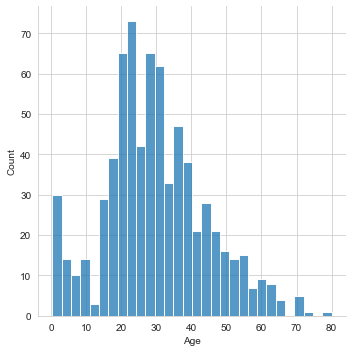

In [25]:
sns.displot(train['Age'].dropna(), kde=False, bins=30);

<AxesSubplot:xlabel='SibSp', ylabel='count'>

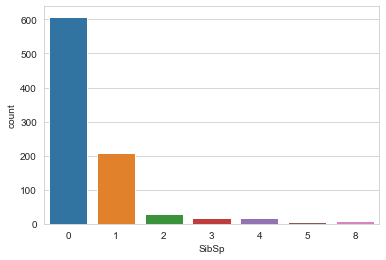

In [26]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

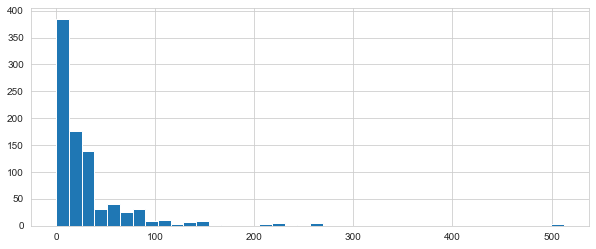

In [38]:
train['Fare'].hist(bins=40, figsize=(10,4))

## Cufflinks for plots

Let's take a quick moment to show an example of cufflinks!

In [39]:
import cufflinks as cf

In [40]:
cf.go_offline()

In [43]:
#train['Fare'].iplot(kind='hist', bins=30)

## Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

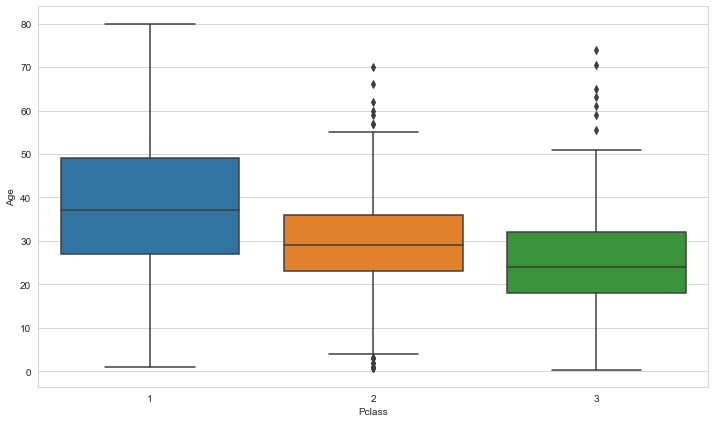

In [46]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [47]:
def impute_Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Now applying the above function for missing values

In [49]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_Age, axis=1)

In [58]:
#sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [59]:
train.drop('Cabin', axis=1, inplace=True)

In [63]:
train.dropna(inplace=True)

## Converting Categorical Features

We need to convert categorical features to dummy variables using pandas! Otherwise our ML algorithm won't be able to directly take in those features as inputs

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [65]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
emabark = pd.get_dummies(train['Embarked'], drop_first=True)

In [66]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [67]:
train = pd.concat([train,sex,emabark], axis=1)

In [70]:
train.drop('PassengerId',axis=1, inplace=True)

In [72]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


# Building a Logistic Regression model

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3
                                                    ,random_state=101)

### Testing and Prediction

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\cruel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [81]:
predictions = logmodel.predict(X_test)

### Evaluting the model

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.83      0.71      0.77       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

